# Telecom Churn Case Study

##  Data Preparation

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Fetching data
churn = pd.read_csv("telecom_churn_data.csv")

In [3]:
churn.shape

(99999, 226)

In [4]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
churn.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [7]:
((churn.isnull().sum()/churn.shape[0])*100)[(churn.isnull().sum()/99999)>0.35]

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

In [8]:
Cat_col = churn.dtypes[churn.dtypes == 'object']
Cat_col

last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [9]:
Churn_null = ((churn.isnull().sum()/churn.shape[0])*100)[(churn.isnull().sum()/99999)>0.35].keys().tolist()
Churn_null

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [10]:
Cols_to_drop_mou = churn.columns[churn.columns.str.contains('_mou')].tolist()
Cols_to_drop_mou

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

### 1. Derive new features

In [11]:
churn['Total_rech_amt_goodphase'] = (churn.total_rech_amt_6 + churn.total_rech_amt_7)/2
churn['Total_rech_amt_goodphase']

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: Total_rech_amt_goodphase, Length: 99999, dtype: float64

In [12]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_rech_amt_goodphase
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,307.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,229.0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,241.5
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,270.0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,273.0


In [13]:
((churn.isnull().sum()/churn.shape[0])*100)[(churn.isnull().sum()/99999)!=0]

loc_og_t2o_mou           1.018010
std_og_t2o_mou           1.018010
loc_ic_t2o_mou           1.018010
last_date_of_month_7     0.601006
last_date_of_month_8     1.100011
                          ...    
night_pck_user_9        74.077741
fb_user_6               74.846748
fb_user_7               74.428744
fb_user_8               73.660737
fb_user_9               74.077741
Length: 166, dtype: float64

In [14]:
#Decrease in ARPU
churn['avg_arpu_action'] = (churn['arpu_7'] + churn['arpu_8'])/2
# Difference of good and action phase ARPU
churn['diff_arpu'] = churn['avg_arpu_action'] - churn['arpu_6']
# Checking whether the arpu has decreased on the action month
churn['decrease_arpu_action'] = np.where(churn['diff_arpu'] < 0, 1, 0)

### 2. Filter high-value customers

In [15]:
high_value_cust = churn.Total_rech_amt_goodphase.quantile(0.7)
high_value_cust

368.5

In [16]:
def high_value(x):
    if x < 368.5:
        return 0
    else:
        return 1

churn["high_value_custm"] = churn.Total_rech_amt_goodphase.apply(high_value)

In [17]:
churn.high_value_custm.value_counts()

0    69988
1    30011
Name: high_value_custm, dtype: int64

Those who have recharged with an amount more than or equal to the 70th percentile of the average recharge amount in the first two months (the good phase).
After filtering the high-value customers, we are getting about 30k rows.

In [18]:
churn.keys()

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'Total_rech_amt_goodphase', 'avg_arpu_action', 'diff_arpu',
       'decrease_arpu_action', 'high_value_custm'],
      dtype='object', length=231)

### 3. Tag churners and remove attributes of the churn phase

In [19]:
churn.total_ic_mou_9.value_counts()

0.00      11485
0.25         28
0.26         24
0.28         23
0.21         22
          ...  
948.03        1
234.26        1
783.79        1
557.38        1
275.19        1
Name: total_ic_mou_9, Length: 31260, dtype: int64

In [20]:
churn.total_og_mou_9.value_counts()

0.00       14143
0.21          81
0.20          49
0.43          35
1.01          33
           ...  
700.16         1
1275.39        1
580.81         1
273.51         1
139.43         1
Name: total_og_mou_9, Length: 39160, dtype: int64

In [21]:
churn.vol_2g_mb_9.value_counts()

0.00      78279
0.01        122
0.02         82
0.03         70
0.04         67
          ...  
157.25        1
125.68        1
102.01        1
443.17        1
723.41        1
Name: vol_2g_mb_9, Length: 13919, dtype: int64

In [22]:
churn.vol_3g_mb_9.value_counts()

0.00       84638
0.01          18
0.04          17
0.02          16
0.03          14
           ...  
133.00         1
2.74           1
3039.88        1
433.50         1
4177.14        1
Name: vol_3g_mb_9, Length: 14472, dtype: int64

In [23]:
is_churned = (churn.total_ic_mou_9 == 0) & (churn.total_og_mou_9 == 0) & (churn.vol_2g_mb_9 ==0) & (churn.vol_3g_mb_9 ==0)

In [24]:
churn.loc[is_churned,'churner']=1

We have used these four columns to make our column of churner.

In [25]:
churn.churner.fillna(0, inplace=True)
churn.churner

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99994    0.0
99995    0.0
99996    1.0
99997    0.0
99998    1.0
Name: churner, Length: 99999, dtype: float64

In [26]:
100*churn.churner.sum()/len(churn)

10.19110191101911

In [27]:
Cols_to_drop_9 = churn.columns[churn.columns.str.contains('_9')].tolist()
len(Cols_to_drop_9)

54

In [28]:
Col_drop = ['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6', 'date_of_last_rech_7',
 'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','date_of_last_rech_8']

In [29]:
unique_list1 = list(set(Churn_null).union(set(Cols_to_drop_mou)))
print(unique_list1)

['std_ic_t2t_mou_6', 'loc_ic_t2f_mou_6', 'max_rech_data_9', 'count_rech_3g_9', 'loc_og_t2m_mou_7', 'std_og_t2t_mou_9', 'count_rech_2g_7', 'fb_user_6', 'std_ic_t2m_mou_7', 'total_rech_data_9', 'spl_og_mou_7', 'arpu_3g_8', 'std_og_t2f_mou_6', 'isd_og_mou_8', 'loc_og_t2c_mou_7', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_8', 'arpu_2g_8', 'loc_ic_t2t_mou_8', 'spl_ic_mou_7', 'loc_og_t2c_mou_8', 'loc_ic_mou_6', 'std_ic_t2f_mou_6', 'loc_og_t2t_mou_9', 'av_rech_amt_data_7', 'fb_user_8', 'isd_og_mou_7', 'night_pck_user_7', 'total_og_mou_9', 'loc_ic_t2m_mou_7', 'std_ic_mou_7', 'arpu_2g_9', 'loc_ic_t2t_mou_7', 'std_og_t2m_mou_6', 'loc_og_mou_7', 'date_of_last_rech_data_7', 'count_rech_3g_6', 'offnet_mou_9', 'date_of_last_rech_data_9', 'loc_og_t2f_mou_8', 'std_ic_t2f_mou_7', 'total_ic_mou_9', 'roam_og_mou_8', 'max_rech_data_7', 'total_ic_mou_6', 'onnet_mou_9', 'max_rech_data_8', 'loc_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_ic_t2o_mou_7', 'total_rech_data_7', 'std_ic_t2o_mou_6', 'arpu_3g_9', 'spl_ic_mou_8

In [30]:
unique_list = list(set(unique_list1).union(set(Cols_to_drop_9)))
print(unique_list)

['std_ic_t2t_mou_6', 'ic_others_9', 'loc_ic_t2f_mou_6', 'max_rech_data_9', 'count_rech_3g_9', 'loc_og_t2m_mou_7', 'std_og_t2t_mou_9', 'count_rech_2g_7', 'fb_user_6', 'std_ic_t2m_mou_7', 'total_rech_data_9', 'spl_og_mou_7', 'arpu_3g_8', 'std_og_t2f_mou_6', 'max_rech_amt_9', 'isd_og_mou_8', 'loc_og_t2c_mou_7', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_8', 'arpu_2g_8', 'loc_ic_t2t_mou_8', 'spl_ic_mou_7', 'arpu_9', 'sachet_2g_9', 'loc_og_t2c_mou_8', 'loc_ic_mou_6', 'std_ic_t2f_mou_6', 'loc_og_t2t_mou_9', 'av_rech_amt_data_7', 'last_date_of_month_9', 'fb_user_8', 'isd_og_mou_7', 'night_pck_user_7', 'total_og_mou_9', 'loc_ic_t2m_mou_7', 'std_ic_mou_7', 'last_day_rch_amt_9', 'arpu_2g_9', 'loc_ic_t2t_mou_7', 'std_og_t2m_mou_6', 'loc_og_mou_7', 'date_of_last_rech_data_7', 'roam_ic_mou_7', 'count_rech_3g_6', 'offnet_mou_9', 'date_of_last_rech_data_9', 'loc_og_t2f_mou_8', 'std_ic_t2f_mou_7', 'total_ic_mou_9', 'roam_og_mou_8', 'max_rech_data_7', 'total_rech_amt_9', 'total_ic_mou_6', 'onnet_mou_9', 'max_

In [31]:
churn.drop(unique_list, axis = 1, inplace = True)

In [32]:
churn.drop(Col_drop, axis = 1, inplace = True)

In [33]:
churn.dropna(axis =0, inplace = True)

In [34]:
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_rech_amt_goodphase,avg_arpu_action,diff_arpu,decrease_arpu_action,high_value_custm,churner
1,7001865778,34.047,355.074,268.321,0.00,0.0,0.0,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,229.0,311.6975,277.6505,0,0,0.0
2,7001625959,167.690,189.058,210.226,0.45,0.0,0.0,0.93,3.14,0.00,...,0.0,0.0,4.17,0.0,241.5,199.6420,31.9520,0,0,0.0
3,7001204172,221.338,251.102,508.054,0.00,0.0,0.0,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,270.0,379.5780,158.2400,0,0,0.0
4,7000142493,261.636,309.876,238.174,0.00,0.0,0.0,0.48,0.00,0.00,...,0.0,0.0,0.00,0.0,273.0,274.0250,12.3890,0,0,0.0
5,7000286308,50.258,58.810,83.386,0.00,0.0,0.0,0.00,0.00,0.23,...,0.0,0.0,0.00,0.0,60.0,71.0980,20.8400,0,0,0.0


In [35]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 1 to 99997
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             91185 non-null  int64  
 1   arpu_6                    91185 non-null  float64
 2   arpu_7                    91185 non-null  float64
 3   arpu_8                    91185 non-null  float64
 4   og_others_6               91185 non-null  float64
 5   og_others_7               91185 non-null  float64
 6   og_others_8               91185 non-null  float64
 7   ic_others_6               91185 non-null  float64
 8   ic_others_7               91185 non-null  float64
 9   ic_others_8               91185 non-null  float64
 10  total_rech_num_6          91185 non-null  int64  
 11  total_rech_num_7          91185 non-null  int64  
 12  total_rech_num_8          91185 non-null  int64  
 13  total_rech_amt_6          91185 non-null  int64  
 14  total_

## Modelling

### 1. Using PCA

In [37]:
#PCA : Principal Component Analysis
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

In [38]:
y = churn["churner"]
X = churn.drop(["churner","mobile_number"],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =100)

Applying class imbalance techniques

In [39]:
# Create SMOTE object with sampling strategy
smote = SMOTE(sampling_strategy='minority')

# Resample the training data
X_tr, y_tr = smote.fit_resample(X_train, y_train)

Scaling the features

In [40]:
def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    return X_scale_final

In [41]:
X_scaled = scale_data(X_tr)
print(X_scaled.shape)
X_scaled.head(5)

(120152, 46)


,arpu_6,arpu_7,arpu_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_rech_amt_goodphase,avg_arpu_action,diff_arpu,decrease_arpu_action,high_value_custm
0,-0.931614,0.123593,-0.313561,-0.141685,-0.020785,-0.019856,-0.072459,-0.089945,-0.08796,-0.690266,...,-0.985858,-0.219076,-0.221716,-0.210248,-0.077693,-0.426027,-0.095242,1.107136,-1.072697,-0.670813
1,-0.681430,-0.173576,-0.437032,-0.141685,-0.020785,-0.019856,-0.072459,-0.089945,-0.08796,-0.825141,...,-0.002530,-0.219076,-0.221716,-0.210248,-0.077693,-0.697871,-0.327003,0.517624,-1.072697,-0.670813
2,-0.571769,-0.471028,-0.293074,-0.141685,-0.020785,-0.019856,-0.072459,-0.089945,-0.08796,-0.015893,...,0.041499,-0.219076,-0.221716,-0.210248,-0.077693,-0.559858,-0.418484,0.270700,-1.072697,-0.670813
3,-0.472701,-0.372602,-0.006483,-0.141685,-0.020785,-0.019856,-0.072459,-0.079665,-0.08796,-0.285642,...,0.707588,-0.219076,-0.221716,-0.210248,-0.077693,-0.325654,-0.212696,0.375129,-1.072697,-0.670813
4,-0.167116,-0.474626,0.151772,-0.141685,-0.020785,-0.019856,-0.072459,-0.089945,-0.08796,-0.285642,...,-0.695714,0.462014,0.691143,1.247164,-0.077693,-0.315896,-0.186897,0.005789,0.932230,-0.670813


In [42]:
pca = PCA(random_state=42)
pca.fit(X_tr)

PCA(random_state=42)

In [43]:
pca.components_

array([[ 2.43047265e-01,  2.65659153e-01,  2.37359696e-01, ...,
         8.46216000e-03, -3.05684740e-05,  2.81658167e-04],
       [ 1.58720314e-01,  1.62504815e-01,  1.07547482e-01, ...,
        -2.36941657e-02,  3.02848117e-05,  1.66938263e-04],
       [-1.62705651e-01, -1.46152979e-01, -8.26341331e-02, ...,
         4.83120951e-02, -5.38007488e-05, -1.73075351e-04],
       ...,
       [-1.35535508e-05,  8.58864312e-05, -8.88564481e-05, ...,
         1.20685424e-05,  9.23224519e-04, -2.36562169e-04],
       [ 6.54653671e-01, -2.18217890e-01, -2.18217890e-01, ...,
         6.54653671e-01, -2.63917177e-16,  5.81786922e-15],
       [-0.00000000e+00, -4.08248290e-01, -4.08248290e-01, ...,
         1.17756355e-16,  7.27385732e-16,  1.98735022e-15]])

In [44]:
cum = pca.explained_variance_ratio_.cumsum()
cum

array([0.32026815, 0.61152583, 0.77021871, 0.83967981, 0.87068241,
       0.90023266, 0.92780658, 0.94751343, 0.96386143, 0.970933  ,
       0.97683785, 0.98169755, 0.98611761, 0.9903308 , 0.9935604 ,
       0.99633379, 0.99791078, 0.99880068, 0.99962142, 0.99985698,
       0.99992035, 0.99994161, 0.99995677, 0.99997164, 0.99998464,
       0.99998969, 0.99999428, 0.9999972 , 0.99999843, 0.99999908,
       0.99999934, 0.99999954, 0.99999971, 0.99999976, 0.99999981,
       0.99999986, 0.99999989, 0.99999992, 0.99999995, 0.99999996,
       0.99999997, 0.99999999, 0.99999999, 1.        , 1.        ,
       1.        ])

In [45]:
len(cum[cum<0.95])

8

In [46]:
pca.explained_variance_ratio_

array([3.20268151e-01, 2.91257676e-01, 1.58692882e-01, 6.94611033e-02,
       3.10025993e-02, 2.95502435e-02, 2.75739271e-02, 1.97068439e-02,
       1.63480010e-02, 7.07157137e-03, 5.90485278e-03, 4.85969457e-03,
       4.42005972e-03, 4.21319015e-03, 3.22960754e-03, 2.77338614e-03,
       1.57699195e-03, 8.89901763e-04, 8.20737438e-04, 2.35562338e-04,
       6.33706476e-05, 2.12581063e-05, 1.51586451e-05, 1.48689389e-05,
       1.30026605e-05, 5.04997304e-06, 4.58727358e-06, 2.92424943e-06,
       1.22163985e-06, 6.59626367e-07, 2.58934394e-07, 1.92654626e-07,
       1.71018502e-07, 5.59486912e-08, 4.97947235e-08, 4.26534244e-08,
       3.87850498e-08, 3.01899493e-08, 2.34283043e-08, 1.47555531e-08,
       1.20137261e-08, 1.08643394e-08, 7.16480975e-09, 6.98475438e-09,
       1.23335523e-32, 1.91786306e-33])

In [47]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

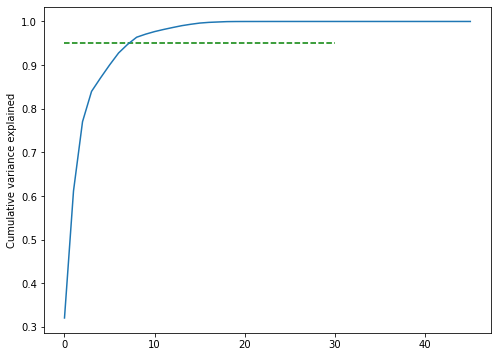

In [48]:
fig = plt.figure(figsize=[8,6])
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [49]:
pca_final = IncrementalPCA(n_components=8)

In [50]:
X_train_pca = pca_final.fit_transform(X_tr)

In [51]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [52]:
corrmat.shape

(8, 8)

<AxesSubplot:>

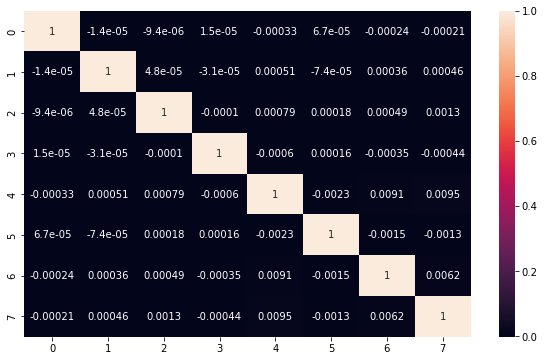

In [53]:
plt.figure(figsize=[10,6])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [54]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(27356, 8)

### Applying logistic regression on the data on our Principal components

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [56]:
learner_pca = LogisticRegression()

In [57]:
model_pca = learner_pca.fit(X_train_pca, y_tr)

In [58]:
pred_probs_test = model_pca.predict_proba(X_test_pca)

In [59]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.76'

Making it a little more unsupervised

In [60]:
pca_again = PCA(0.9)

In [61]:
X_train_pca2 = pca_again.fit_transform(X_tr)

In [62]:
X_train_pca2.shape

(120152, 6)

In [63]:
learner_pca2 = LogisticRegression()

In [64]:
model_pca2 = learner_pca2.fit(X_train_pca2, y_tr)

In [65]:
X_test_pca2 = pca_again.transform(X_test)

In [66]:
X_test_pca2.shape

(27356, 6)

In [67]:
pred_probs_test2 = model_pca2.predict_proba(X_test_pca2)[:,1]

In [68]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.76'

### 2. Using Decsion trees

In [70]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_tr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [73]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.768545,0.075119,0.014960,0.000632,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.606242,0.610436,0.634956,0.622056,0.638535,0.622445,0.012824,5
1,0.781111,0.116409,0.017752,0.002309,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.606242,0.610436,0.634956,0.622056,0.638535,0.622445,0.012824,5
2,0.713890,0.041781,0.014961,0.000892,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.606076,0.610686,0.634956,0.621640,0.637953,0.622262,0.012679,7
3,0.763957,0.065207,0.026131,0.018516,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.606076,0.610686,0.634956,0.621640,0.637953,0.622262,0.012679,7
4,1.270595,0.114785,0.016556,0.002491,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.734665,0.718292,0.714690,0.714357,0.715605,0.719522,0.007697,2
5,1.288557,0.120425,0.017552,0.002412,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.734665,0.718292,0.714690,0.714440,0.715605,0.719539,0.007685,1
6,1.082119,0.058832,0.014553,0.000792,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.711194,0.714048,0.709779,0.713192,0.702289,0.710100,0.004182,3
7,1.150727,0.085757,0.015570,0.001617,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.711194,0.714048,0.709779,0.713192,0.702206,0.710084,0.004213,4


In [74]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.7195386052055437
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [77]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_tr)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [79]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [81]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_tr, y_train_pred)
print(confusion)

[[48225 11851]
 [16247 43829]]


In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_tr, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP/float(TP+FN))

# Specificity
print("Specificity:-", TN/float(TN+FP))

Accuracy:- 0.7661462147945935
Sensitivity:- 0.7295592249816899
Specificity:- 0.8027332046074972


In [89]:
#Prediction on the test set
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[20367  5387]
 [  655   947]]


In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP/float(TP+FN))

# Specificity
print("Specificity:-", TN/float(TN+FP))

Accuracy:- 0.7791343763708144
Sensitivity:- 0.5911360799001248
Specificity:- 0.7908286091480935


We will use the model which give us better accuracy and other metrics.